Objetivos de la práctica:


1.   Entender la importancia de los parámetros del modelo: Controlan cómo se construye el límite de decisión
2.   Usar el módulo *time* para medir los tiempos de entrenamiento y predicción
3.   Comprender intuitivamente para qué sirven los parámetros más relevantes de SVC: El **kernel**, **C**, y **gamma**


**Iniciemos**

**Objetivo 1: Entender la importancia de los parámetros del modelo: Controlan cómo se construye el límite de decisión, y por lo tanto la exactitud**

Usemos un dataset conocido: [*breast cancer*](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset). Lo usamos en la práctica 3 del Laboratorio anterior, *Cómo elegir entre aprendizaje supervisado y no supervisado*

Para usar los datos, hemos seguido los siguientes pasos:

1.  Cargar los datos
2.  Separar las características (atributos) de las etiquetas (target)
3.  Si es necesario, preparalos (pre procesarlos)
4. Dividir los datos en entrenamiento y prueba (Inténtalo)

In [ ]:
# 1. Cargar los datos
from sklearn.datasets import load_breast_cancer
BreastCancerDataset = load_breast_cancer()

# 2. Separar las características (atributos) de las etiquetas (target)
X = BreastCancerDataset.data      # X contiene los atributos
y = BreastCancerDataset.target    # y contiene las etiquetas. Como las etiquetas es el valor que se intenta aprender,
                                  # también reciben el nombre de target o en español, objetivo.

# 3. Si es necesario, preparalos (pre procesarlos)
# En este caso, los datos están limpios                                  

Ya sabemos cómo usar un clasificador. Necesitamos:


1.   Importar el modelo de Sklearn
2.   Crear el modelo
3.   Entrenar el modelo
4.   Evaluar el modelo

En el punto 2, **crear el modelo, podemos asignar los valores de los parámetros** para el clasificador. El valor que le demos a estos parámetros es muy importante, pues valores distintos generaran superficies de decisión distintas. Los parámetros pueden causar sobreajuste si no son seleccionados adecuadamente.

Para un clasificador basado en máquinas de vectores de soporte, podemos ver sus parametros en la [documentación de Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
from sklearn.svm import SVC   # Importar de Sklearn SVC (Clasificador basado en máquinas de vectores de soporte)
clf = SVC(kernel = 'linear')  # Crear el modelo. Usemos la opción de elegir el parámetro para el kernel; seleccionemos
                              # 'linear' aunque existen mas opciones

Después de importar y crear el modelo con los parámetros elegidos, es necesario **entrenar** y **evaluar** el modelo:

1.   Importar los módulos necesarios para dividir los datos, y calcular la exactitud
2.   Dividir los datos en conjunto de entrenamiento y de evaluación
3.   Entrenar el modelo con el conjunto de entrenamiento
4.   Evaluar o usar al modelo con el conjunto de prueba
5.   Calcular la exactitud


In [ ]:
# 1 Importar los módulos necesarios para dividir los datos, y calcular la exactitud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 2 Dividir los datos en conjunto de entrenamiento y de evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 3 Entrenar el modelo con el conjunto de entrenamiento
clf = SVC(kernel = 'linear')  # Para recordar
clf.fit(X_train, y_train)

# 4 Evaluar al modelo con el conjunto de prueba
y_pred = clf.predict(X_test)

# 5 Calcular la exactitud
accuracy_score(y_test, y_pred)

0.9649122807017544

Para hacer una variante cambiamos ahora el kernel de 'linear' a 'rbf'. ***¿Cuál es la exactitud?***

In [ ]:
clf = SVC(kernel = 'rbf')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.935672514619883

Ahora demos valores distintos al parámetro C:


1.   C = 1
2.   C = 10
3.   C = 100

¿Cuál es la exactitud?

In [ ]:
clf = SVC(kernel = 'rbf', C=130)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9883040935672515

¿Qué combinación de parámetros fue mejor?

Lo mejor que obtuvimos nosotros sin ser tan exhaustivos fue una **exactitud de 0.988**. ¿Nos venciste?


Hasta ahora nuestro objetivo es convencerte que la selección de parámetros afecta el límite de decisión, y en consecuencia la exactitud de las predicciones. Veamos ahora qué significan estos parámetros.


---




**Objetivo 2: Usar el módulo time para medir los tiempos de entrenamiento y predicción**

Además de preocuparnos por la exactitud, es importante considerar el tiempo de entrenamiento y de predicción como un factor para elegir un modelo.

Si la velocidad es una consideración importante, entonces es posible que necesites usar menos datos de entrenamiento, y en consecuencia sacrificar un poco de exactitud. Pero si eso significa que puedes entrenar/predecir más rápido, tendrías que valorarlo.

¿En cuáles de estas aplicaciones crees que el tiempo de ejecución es especialmente importante?

1. Predecir el autor de un correo electrónico
2. Encontrar fraudes con tarjetas de crédito para bloquear una transacción antes de que se realice
3. El reconocimiento de voz, como Siri, Alexa, etc.

¿Cómo podemos medir el tiempo que tarda en entrenar?

In [ ]:
from time import time

t0 = time()
clf.fit(X, y)       # Entrenar usando TODOS las instancias del Dataset
print("Tiempo de entrenamiento con todas las instancias: ", round(time()-t0, 5), " segundos")

t0 = time()
clf.predict([X[58,:]]) #Predecir un solo ejemplo
print("Tiempo de predicción: ", round(time()-t0, 5), " segundos")

Tiempo de entrenamiento con todas las instancias:  0.01383  segundos
Tiempo de predicción:  0.00071  segundos


*   ¿Cuántas instancias hay en el *dataset*?
*   ¿Cuántas características tiene cada instancia?

In [ ]:
print("Número de intancias: ", X.shape[0]) # len(X)
print("Número de instancias de las características: ", X[0,:].shape[0]) # len(X[0])

Número de intancias:  569
Número de instancias de las características:  30


Más características harían más tardado el tiempo de entrenamiento y de predicción. ¿El número de ejemplos afectaría en la etapa de entrenamiento o de predicción? ¿o ambas?

En la siguiente celda agrega el código para medir el tiempo de entrenamiento y la exactitud con diferentes tamaños del conjunto de datos de entrenamiento.


1.   70 % del dataset
2.   50 % del dataset
3.   30 % del dataset

**Recuerda:** Es necesario que hagas una copia de esta Notebook en tu Drive para que puedas trabajar en ella. En el menú, Ve a *Archivo>Guardar una copia en Drive*

In [ ]:
# Para el 70% del DataSet

# 1 Importar los módulos necesarios para dividir los datos, y calcular la exactitud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time

# 2 Dividir los datos en conjunto de entrenamiento y de evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)

# 3 Entrenar el modelo con el conjunto de entrenamiento
clf = SVC(kernel = 'linear')  # Para recordar
t0 = time()
clf.fit(X_train, y_train)       # Entrenar usando TODOS las instancias del Dataset
print("Tiempo de entrenamiento con todas las instancias: ", round(time()-t0, 5), " segundos")

t0 = time()
clf.predict([X[58,:]]) #Predecir un solo ejemplo
print("Tiempo de predicción: ", round(time()-t0, 5), " segundos")

Tiempo de entrenamiento con todas las instancias:  1.76499  segundos
Tiempo de predicción:  0.00045  segundos


In [ ]:
# Para el 50% del DataSet

# 1 Importar los módulos necesarios para dividir los datos, y calcular la exactitud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time

# 2 Dividir los datos en conjunto de entrenamiento y de evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.50, random_state=42)

# 3 Entrenar el modelo con el conjunto de entrenamiento
clf = SVC(kernel = 'linear')  # Para recordar
t0 = time()
clf.fit(X_train, y_train)       # Entrenar usando TODOS las instancias del Dataset
print("Tiempo de entrenamiento con todas las instancias: ", round(time()-t0, 5), " segundos")

t0 = time()
clf.predict([X[58,:]]) #Predecir un solo ejemplo
print("Tiempo de predicción: ", round(time()-t0, 5), " segundos")

Tiempo de entrenamiento con todas las instancias:  1.32464  segundos
Tiempo de predicción:  0.0005  segundos


In [ ]:
# Para el 30% del DataSet

# 1 Importar los módulos necesarios para dividir los datos, y calcular la exactitud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time

# 2 Dividir los datos en conjunto de entrenamiento y de evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.30, random_state=42)

# 3 Entrenar el modelo con el conjunto de entrenamiento
clf = SVC(kernel = 'linear')  # Para recordar
t0 = time()
clf.fit(X_train, y_train)       # Entrenar usando TODOS las instancias del Dataset
print("Tiempo de entrenamiento con todas las instancias: ", round(time()-t0, 5), " segundos")

t0 = time()
clf.predict([X[58,:]]) #Predecir un solo ejemplo
print("Tiempo de predicción: ", round(time()-t0, 5), " segundos")

Tiempo de entrenamiento con todas las instancias:  1.36521  segundos
Tiempo de predicción:  0.00061  segundos




---

## **Objetivo 3: Comprender intuitivamente para qué sirven los parámetros más relevantes de SVC: El kernel, C, y gamma**

Parámetros de máquinas de vectores de soporte que abarcaremos en esta práctica


*   [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html): C, kernel y gamma


Analicemos intuitivamente el comportamiento de estos parámetros. Como de costrumbre, usando solo dos dimensiones pues es más fácil de graficar y visualizar.


**Parámetro C**

Para valores grandes de C, la optimización elegirá un hiperplano de menor margen si ese hiperplano hace un mejor trabajo al clasificar correctamente todos los puntos de entrenamiento. Por el contrario, un valor muy pequeño de C hará que el optimizador busque un hiperplano de separación de mayor margen, incluso si ese hiperplano clasifica erróneamente más puntos.

* Valores mayores de C => Mayor peso a la correcta clasificación que al margen
* Valores menores de C => Menor peso a la correcta clasificación que al margen


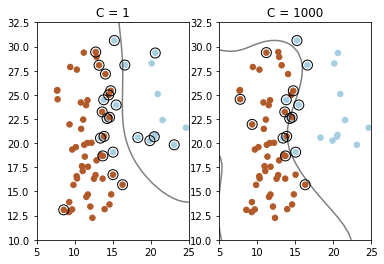

In [1]:
import numpy as np              
import matplotlib.pyplot as plt   

from sklearn.datasets import load_breast_cancer
BreastCancerDataset = load_breast_cancer() # Cargar los datos

# Solo usaremos una sección de los ejemplos.
X = BreastCancerDataset.data[500:,[0,1]]  # X contiene solo los dos primero atributos
y = BreastCancerDataset.target[500:]      # y contiene las etiquetas.

# No es necesario importar en cada celda. Lo hacemos para recordarte que es necesario antes de
# generar el modelo
from sklearn import svm

# Probemos con 2 valores distintos de C
C1 = 1
C2 = 1000

# Creación del primer clasificador clf_1
clf_1 = svm.SVC(kernel='rbf', C=C1)
clf_1.fit(X, y)

# Creación del segundo clasificador clf_2
clf_2 = svm.SVC(kernel='rbf', C=C2)
clf_2.fit(X, y)

# ********** Gráficas *****************************************
# Crear malla
xx = np.linspace(5, 25, 30)       # Cambiar límites según los datos
yy = np.linspace(10, 32.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Resultados de clf_1
plt.subplot(121)
plt.title("C = "+str(C1))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# Graficar límite de decisión
Z = clf_1.decision_function(xy).reshape(XX.shape)
ax = plt.gca()
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])
# Graficar vectores de soporte
ax.scatter(clf_1.support_vectors_[:, 0], clf_1.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

# Resultados de clf_2
plt.subplot(122)
plt.title("C = " + str(C2))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# Graficar límite de decisión
Z = clf_2.decision_function(xy).reshape(XX.shape)
ax = plt.gca()
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])
# Graficar vectores de soporte
ax.scatter(clf_2.support_vectors_[:, 0], clf_2.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

Modifica los valores C y observa cómo se mueve el límite de decisión.




---

**Parámetro gamma**

Ahora usemos datos sintéticos (inventados) para observar el comportamiento de gamma.

El parámetro gamma define qué tan lejos llega la influencia de las instancias de entrenamiento en el cálculo del margen (separación entre clases y hiperplano). Estas instancias también reciben el nombre de vectores de soporte.

* Valores bajos de gamma => significan "lejos". Es decir, más vectores de soporte
* Valores altos de gamma => significan "cerca". Es decir, menos vectores de soporte.

En otras palabras, con gamma baja, los puntos alejados del hiperplano de separación se consideran en el cálculo del margen. Con gamma alta, los puntos cercanos al hiperplano se consideran en el cálculo.

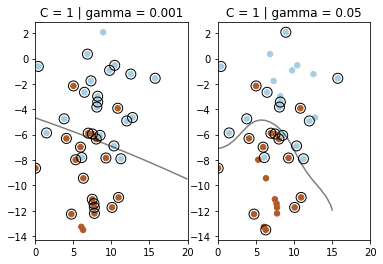

In [2]:
import numpy as np              
import matplotlib.pyplot as plt 

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=6, cluster_std=3)

# No es necesario importar en cada celda. Lo hacemos para recordarte que es necesario antes de
# generar el modelo
from sklearn import svm

# Probemos con 2 valores distintos de C
C1 = 1
C2 = 1

# Probemos con 2 valores distintos de gamma
gamma1 = 0.001#'auto'   # Siempre, 'auto' asigna es un valor más pequeño para gamma que 'scale'
gamma2 = 0.05#'scale'

# Creación del primer clasificador clf_1
clf_1 = svm.SVC(kernel='rbf', C=C1, gamma=gamma1)
clf_1.fit(X, y)
# Creación del segundo clasificador clf_2
clf_2 = svm.SVC(kernel='rbf', C=C2, gamma=gamma2)
clf_2.fit(X, y)

#****************** Gráficas  ***************************
# Malla
xx = np.linspace(0, 20, 30)
yy = np.linspace(-12, 0, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

plt.subplot(121)
plt.title("C = " + str(C1) + " | gamma = " + str(gamma1))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Resultados de clf_1
Z = clf_1.decision_function(xy).reshape(XX.shape)
# Graficar límite de decisión
ax = plt.gca()
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])
# Graficar vectores de soporte
ax.scatter(clf_1.support_vectors_[:, 0], clf_1.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')


# Resultados de clf_2
plt.subplot(122)
plt.title("C = " + str(C2) + " | gamma = " + str(gamma2))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# Graficar límite de decisión
Z = clf_2.decision_function(xy).reshape(XX.shape)
ax = plt.gca()
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])
# Graficar vectores de soporte
ax.scatter(clf_2.support_vectors_[:, 0], clf_2.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

Como pudiste observar **gamma=auto** usó más vectores de soporte para encontrar el límite de decisión. Mientras que **gamma=scale** usó menos. Siempre, 'auto' asigna es un valor más pequeño para gamma que 'scale'.

Recuerda:

* Valores bajos de gamma => significan "lejos". Es decir, más vectores de soporte
* Valores altos de gamma => significan "cerca". Es decir, menos vectores de soporte.